# Energy in the Balance: PV reliability to power the Energy Transition

This journal documents the analysis presented at PVRW 2023 by Heather Mirletz. We explore the energy balance as it is effected by the different aspects of PV reliability, or un-reliability. We will use the PV ICE tool baseline and assume immortal PV modules. Then we will add in predicted degradation, and examine the new deployment, mass, and energy requirements to meet energy transition targets. Next we will add in Weibull controlled failures, and finally economic project lifetimes to examine repowering problems.

Through this we will identify the key aspects of PV reliability to emphasize for easing the challenge of energy transition.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'PVRW2023')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#0079C2','#00A4E4','#F7A11A','#5D9732','#933C06',]
import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV ICE','Immortal','Degradation','Failures','Project Life\nRepowering'] #

Scenarios and Materials

In [3]:
#creating scenarios
scennames = ['PV ICE','Immortal','Degradation','Failures','ProjectLife']
MATERIALS = ['glass','silver','silicon', 'copper', 'aluminium_frames'] #'encapsulant', 'backsheet',
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [4]:
#load in a baseline and materials for modification
import PV_ICE

sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)
for scen in scennames:
    sim1.createScenario(name=scen, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim1.scenario[scen].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVRW2023


## Modify Scenarios

### Immortal

In [5]:
# Immortal

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Immortal', 'mod_degradation', 0.0, start_year=2022) #
#Mod Project Lifetime
sim1.modifyScenario('Immortal', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Immortal', 'mod_reliability_t50', 250, start_year=2022)
#t90
sim1.modifyScenario('Immortal', 'mod_reliability_t90', 280, start_year=2022) 



### Degradation

In [6]:
# Degradation

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Degradation', 'mod_degradation', 0.7, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('Degradation', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Degradation', 'mod_reliability_t50', 250, start_year=2022)
#t90
sim1.modifyScenario('Degradation', 'mod_reliability_t90', 280, start_year=2022) 

### Failures

In [7]:
# Failures

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Failures', 'mod_degradation', 0.0, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('Failures', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Failures', 'mod_reliability_t50', 32, start_year=2022) #for a 30 year module
#t90
sim1.modifyScenario('Failures', 'mod_reliability_t90', 36, start_year=2022) #for a 30 year module

### Project Lifetime/Repowering

In [8]:
# Project Lifetime/Repowering

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('ProjectLife', 'mod_degradation', 0.0, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('ProjectLife', 'mod_lifetime', 30, start_year=2022) #30 year project life
#T50
sim1.modifyScenario('ProjectLife', 'mod_reliability_t50', 250, start_year=2022) #for a 30 year module
#t90
sim1.modifyScenario('ProjectLife', 'mod_reliability_t90', 280, start_year=2022) #for a 30 year module

Modify Years

In [9]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Mass, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Mass, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, years now encompass  2000  to  2100
Data trimmed for Energy, yea

Global Deployment Projection

In [10]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)

#fig, ax1 = plt.subplots()

#ax1.plot(global_projection['World_cum']/1e6, color='orange')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='orange')
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#plt.show()


Single Install in time

In [11]:
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
single_deploy_2025 = pd.DataFrame(index=idx_temp, columns=['MW'], dtype=float)
single_deploy_2025['MW'] = 0.0
single_deploy_2025.loc[2025,'MW'] = 100.0

In [12]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value=single_deploy_2025['MW'], start_year=2000) #
#single deployment: single_deploy_2025['MW']
#global deployment: global_projection['World_annual_[MWdc]']

## Run Simulation - No Replacements

In [13]:
sim1.calculateFlows()
#sim1.calculateFlows(scenarios=['CheapCrap'], weibullInputParams=cheapcrapweibull)

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  PV ICE  =  1.1466263852697323  tonnes.
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  PV ICE  =  13.465650925158647  tonnes.
Working on Scenario:  Immortal
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  Immortal  =  2.296891511169899e-06  tonnes.
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  Immortal  =  2.697403417513214e-05  tonnes.
Working 

In [14]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots
ii_allenergy, ii_energyGen, ii_energy_demands = sim1.aggregateEnergyResults()

C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:1876: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands[colname] = energy_demands.filter(like=scen).sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:1876: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands[colname] = energy_demands.filter(like=scen).sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:1876: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Text(0.5, 1.0, 'Effective Capacity: No Replacements')

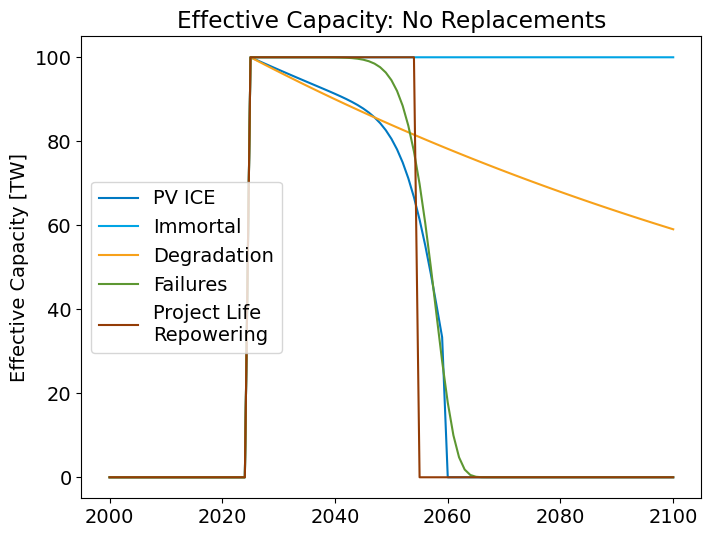

In [15]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity, label=scennames_labels)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)


Note to self: changing the degradation of nameplate to 80% instead of 50% kill threshold did not change the above result

## Run Simulation - Replacements

In [ ]:
#currently takes 15 mins to run with 5 mateirals and 5 scenarios

for row in range (0,len(sim1.scenario['PV ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in scennames: #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim1.scenario[scen].dataOut_m['Installed_Capacity_[W]'][row])/1e6)  # MWATTS
        sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim1.calculateFlows(scenarios=[scen]) # , bifacialityfactors=bifiPathDict[scen]

In [ ]:
cc_yearly, cc_cumu = sim1.aggregateResults() #have to do this to get auto plots
allenergy, energyGen, energy_demands = sim1.aggregateEnergyResults()

In [ ]:
effective_capacity = cc_yearly.filter(like='ActiveCapacity')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity, label=scennames_labels)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)

### Cumulative Installs with Replacements

In [ ]:
cumu_installs = cc_cumu.filter(like='newInstalled')
plt.bar(scennames, cumu_installs.loc[2100]/1e6, tick_label=scennames_labels, color=colorpalette)
#plt.legend(scennames)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')

In [ ]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
energyGen_cumu = energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]

In [ ]:
plt.bar(netEnergy_cumu.columns, netEnergy_cumu.loc[2100]/1e12, 
        tick_label=(scennames_labels), color=colorpalette)
plt.title('Net Energy Cumulatively with Replacements')
plt.ylabel('Cumulative Net Energy [TWh]')
plt.ylim(4e6,5.5e6)

# Explore Degradation
explore effect of the range of degradation rates as presented in Jordan et al 2022

In [ ]:
#load in a baseline and materials for modification
scennames2 = ['']
        scenname = str(Lifetime_Range[life])+'years & '+ str(Recycling_Range[recycle])+'% Recycled' #name the scenario
        r1.createScenario(name=scenname,massmodulefile=modulefile) #create the scenario with name

for life in range(0,len(Lifetime_Range)): #loop over lifetimes
    for recycle in range (0,len(Recycling_Range)): #loop over recycling rates
        
sim2 = PV_ICE.Simulation(name='sim1', path=testfolder)
for scen in scennames2:
    sim2.createScenario(name=scen, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim1.scenario[scen].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
# Degradation

#Lifetime and Degradation
#values taken from lifetime vs recycling paper

#Mod Project Lifetime
sim2.modifyScenario('Degradation', 'mod_lifetime', 200, start_year=2022) #
#T50
sim2.modifyScenario('Degradation', 'mod_reliability_t50', 250, start_year=2022)
#t90
sim2.modifyScenario('Degradation', 'mod_reliability_t90', 280, start_year=2022) 

In [ ]:
#degradation rates:
#dictionary of deg rates range from Jordan et al 2022

for scen in scennames2:
    sim2.modifyScenario(scen, 'mod_degradation', VAR, start_year=2022) # Jordan et al 2022

# Explore Failures
Explore the effect of the range of failures from Heislmair and IRENA

# Explore Project Life / Repowering
Explore if repowering happens at varying lifetimes

In [ ]:
# years of project life: 8,10,12,15,18,20


# Repowering with Bifi
Run a scenario where an older (PV ICE baseline) single install is put in. Then at economic lifetime, repower with bifi panels (change the module type after first install before second install).

In [ ]:
#modify silver usage
#sim1.scenario['TOPCon'].modifyMaterials('silver', 'mat_massperm2', celltech_aguse.loc[2022:,'TOPCon'], start_year=2022)

In [ ]:
single_deploy_2020 = pd.DataFrame(index=idx_temp, columns=['MW'], dtype=float)
single_deploy_2020['MW'] = 0.0
single_deploy_2020.loc[2020,'MW'] = 100.0

In [ ]:
bifiFactors = {'PERC_50':0.7, # ITRPV 2022, Fig. 58
               'SHJ':0.9, # ITRPV 2022, Fig. 58
               'TOPCon':0.8, # ITRPV 2022, Fig. 58
               'Perovskite': 0.0,
               'RecycledPERC':0.6,
                'PV_ICE':0.0,
                'CheapCrap':0.0} 

#MAY NEED TO CHANGE TO BE DYNAMIC

In [ ]:
#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2050,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifi_perc = df_temp.copy()
bifi_perc['bifi'] = bifiFactors['PERC']
bifi_shj = df_temp.copy()
bifi_shj['bifi'] = bifiFactors['SHJ']
bifi_topcon = df_temp.copy()
bifi_topcon['bifi'] = bifiFactors['TOPCon']

In [ ]:
bifi_perc.to_csv(path_or_buf=os.path.join(testfolder,'bifi_perc.csv'), index_label='Year')
bifi_shj.to_csv(path_or_buf=os.path.join(testfolder,'bifi_shj.csv'), index_label='Year')
bifi_topcon.to_csv(path_or_buf=os.path.join(testfolder,'bifi_topcon.csv'), index_label='Year')

In [ ]:
bifi_perc_path = os.path.join(testfolder,'bifi_perc.csv')
bifi_shj_path = os.path.join(testfolder,'bifi_shj.csv')
bifi_topcon_path = os.path.join(testfolder,'bifi_topcon.csv')